In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('worldbank_nominal_gdp.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            151 non-null    float64
 5   1961            154 non-null    float64
 6   1962            156 non-null    float64
 7   1963            156 non-null    float64
 8   1964            156 non-null    float64
 9   1965            162 non-null    float64
 10  1966            163 non-null    float64
 11  1967            167 non-null    float64
 12  1968            168 non-null    float64
 13  1969            168 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            191 non-null    float64
 17  1973            191 non-null    flo

In [36]:
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.420993e+10,2.496326e+10,2.707802e+10,3.177483e+10,3.028492e+10,3.381219e+10,...,8.289612e+11,9.730251e+11,1.012291e+12,1.009747e+12,9.334072e+11,1.085605e+12,1.191639e+12,1.176910e+12,1.287677e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190511e+10,1.270803e+10,1.363092e+10,1.446926e+10,1.580394e+10,1.692124e+10,...,7.000282e+11,6.940513e+11,7.778404e+11,8.332889e+11,7.972952e+11,8.581145e+11,8.936399e+11,8.147285e+11,6.700257e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.487516e+10,8.039694e+10,NaN
5,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.198867e+10,1.325827e+10,1.537951e+10,1.558511e+10,1.524146e+10,1.803201e+10,1.901724e+10,2.354718e+10,2.717774e+10,NaN
6,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.324648e+09,3.380613e+09,3.785067e+09,4.039844e+09,NaN
7,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,1.999708e+10,2.032767e+10,2.236296e+10,2.481163e+10,2.676929e+10,...,2.524103e+12,2.598475e+12,2.907330e+12,2.949355e+12,2.596423e+12,3.077907e+12,3.738584e+12,3.606002e+12,3.704768e+12,NaN
8,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.692553e+11,3.905168e+11,4.270494e+11,4.179897e+11,3.494730e+11,4.151788e+11,5.027319e+11,5.141304e+11,5.370788e+11,NaN
9,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,1.586547e+10,2.013222e+10,1.833769e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,5.575323e+11,6.436284e+11,5.248199e+11,4.477547e+11,3.857405e+11,4.865641e+11,6.327901e+11,6.460753e+11,6.332667e+11,NaN


In [37]:
df = df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

In [38]:
df = df.rename(columns={'Country Name': 'Country'})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      266 non-null    object 
 1   1960         151 non-null    float64
 2   1961         154 non-null    float64
 3   1962         156 non-null    float64
 4   1963         156 non-null    float64
 5   1964         156 non-null    float64
 6   1965         162 non-null    float64
 7   1966         163 non-null    float64
 8   1967         167 non-null    float64
 9   1968         168 non-null    float64
 10  1969         168 non-null    float64
 11  1970         190 non-null    float64
 12  1971         191 non-null    float64
 13  1972         191 non-null    float64
 14  1973         191 non-null    float64
 15  1974         191 non-null    float64
 16  1975         195 non-null    float64
 17  1976         195 non-null    float64
 18  1977         198 non-null    float64
 19  1978    

In [40]:
df.dtypes

Country         object
1960           float64
1961           float64
1962           float64
1963           float64
                ...   
2021           float64
2022           float64
2023           float64
2024           float64
Unnamed: 69    float64
Length: 67, dtype: object

In [41]:
years = [str(year) for year in range(2000, 2025)]
df_tidy = df.melt(
    id_vars='Country',
    value_vars=years,
    var_name='Year',
    value_name='GDP'
)

In [42]:
df_tidy.dtypes

Country     object
Year        object
GDP        float64
dtype: object

In [43]:
df_tidy['Year'] = df_tidy['Year'].astype(int)

In [44]:
df_tidy.dtypes

Country     object
Year         int64
GDP        float64
dtype: object

In [45]:
removable_countries = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'Caribbean small states',
    'Central Europe and the Baltics',
    'Early-demographic dividend',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'East Asia & Pacific (IDA & IBRD countries)',
    'Euro Area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'Europe & Central Asia (IDA & IBRD countries)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean (IDA & IBRD countries)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'North America',
    'Not classified',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Pre-demographic dividend',
    'Small states',
    'South Asia',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Upper middle income',
    'World',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Middle East, North Africa, Afghanistan & Pakistan',
    'Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)'
    'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)',
    'Euro area',
    'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)', 
    'Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)',
]

In [46]:
df_filtered = df_tidy.query('Country not in @removable_countries').reset_index()

In [47]:
top_10_nominal_gdp = df_filtered.query('Year == 2024').sort_values(by='GDP', ascending=False).reset_index(drop=True)[0:10]

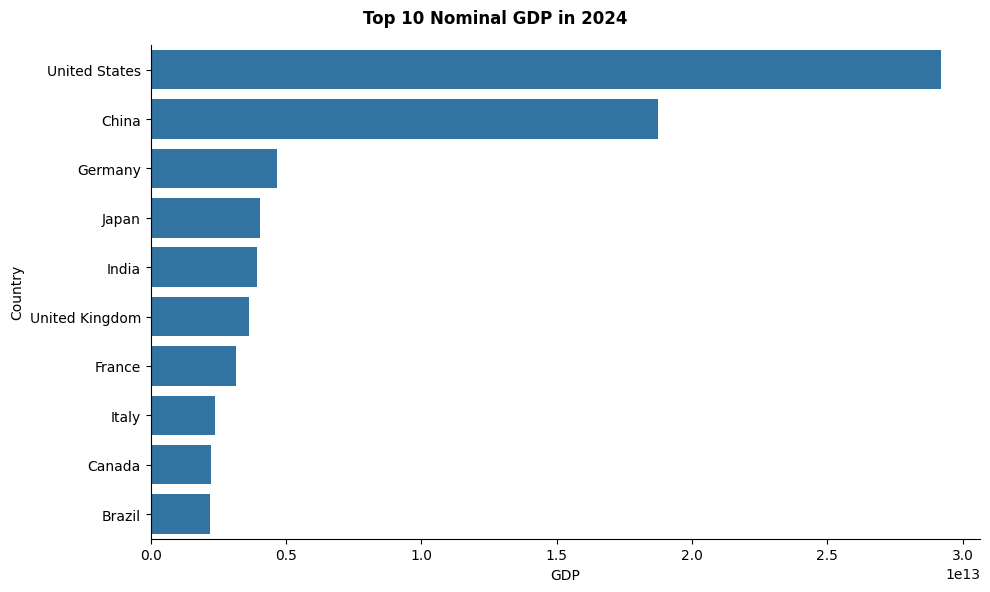

In [48]:
plt.figure(figsize=(10, 6))

sns.barplot(data=top_10_nominal_gdp, orient='h', x='GDP', y='Country')

plt.suptitle("Top 10 Nominal GDP in 2024", fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()